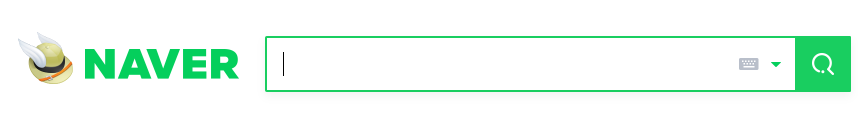

# <네이버 블로그 데이터를 이용한 워드 클라우드>

### 1. 사전준비

In [ ]:
!pip install konlpy
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from PIL import Image
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 지역 별 네이버 블로그 크롤링(각 1000개)
yeoju = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_여주여행_검색결과.xlsx') # 여주
gapyeong = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_가평여행_검색결과.xlsx') # 가평
chuncheon = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_춘천여행_검색결과.xlsx') # 춘천

haman = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_함안여행_검색결과.xlsx') # 함안
changnyeong = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_창녕여행_검색결과.xlsx') # 창녕
hapcheon = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_합천여행_검색결과.xlsx') # 합천

yesan = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_예산여행_검색결과.xlsx') #예산
cheonan = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_천안여행_검색결과.xlsx') # 천안
pyeongtaek = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/naver/naver_평택여행_검색결과.xlsx') # 평택

# 기존 사전에 등록되어있는 1차 불용어 리스트
stopword_data = pd.read_excel('/content/drive/MyDrive/2021 문화관광/DataSet/stopword_list.xlsx') # 1차 불용어 리스트
stopword_data = list(stopword_data['stopword'])

### 2. 사용자함수 정의

In [ ]:
# 1차 불용어 처리함수 - 외부에서 사전 가져옴
def First_stopword(word_tokenize, stopword_data):
  result = []

  for w in word_tokenize:
    if w not in stopword_data:
      result.append(w)

  return result

In [ ]:
# 전처리 함수
def Text_Preprocessing(x, stopword):
  x = x['text'].str.cat()
  okt = Okt()
  tok_x = word_tokenize(x) # 토큰화
  x = First_stopword(tok_x,stopword_data) # 불용어 제거
  x = pd.Series(x).str.cat()
  x_noun = okt.nouns(x)
  for j, k in enumerate(x_noun):
    if len(k) < 2: # 1글자 단어 제거
      x_noun.pop(j)

  # 2차 불용어 제거 - 명사에서
  stopword_x_noun = stopword
  stopword_x_noun.split(',')
  x_noun = [i for i in x_noun if i not in stopword_x_noun] # 불용어가 제거된 말뭉치
  
  count_x = Counter(x_noun)
  x_list = dict(count_x.most_common(100)) # 빈도수 top 100개
  
  return x_list

In [ ]:
# 워드클라우드 함수
def plotting_WordCloud(x):
  # plotting WordCloud
  icon = Image.open('/content/drive/MyDrive/2021 문화관광/phploeBuh.png').resize((600,600)) # 워드클라우드 모양 변형을 위한 마스크 설정
  mask = np.array(icon)
  wc = WordCloud(font_path = '/content/drive/My Drive/파이썬/NanumGothic.ttf',
                 background_color='white', # 배경색
                 width = 1000, # 넓이
                 height = 1000, # 길이
                 max_words = 100, # 최대 수용 단어 개수
                 max_font_size = 100,
                 mask = mask).generate_from_frequencies(dict(x))
  plt.figure(figsize= (15,10))
  plt.axis('off')
  plt.imshow(wc,interpolation='bilinear')
  return

### 3. 각 지역별 불용어 리스트

In [ ]:
stopword_yeoju = '여주,여주시,여행,경기도,시간,오늘,이번,곳,여행지,방문,바로,우리,이야기,계획,소개,지난,사람,생각,세계,포스팅,타고,시작,하나,자리,아침,출발,모래,자세,다음,처음,남한,어디,마지막,모습,도착,가기,거리,것,공간,관광,관광지,날씨,때문,버스,실컷,인지,기절,스타일,먼저,아목,마감,숨결,주사,나기,중간,주의,얼마나,등등,와우,정말,도일,정안,감사,남,성비,모텔,숙면,통,유리창,테이블,소파,비대,지로,랍,주간,그늘,사용,곳강,섬유,가전,자주,던데,입구,무료,주차장,평일,노인,시민,장애인,소원,해주시,수령,년,소망,사투,근처,검색,발견,국물,고민,다가,기도,일이,입장료,성인,기준,세미,점심,아이,기회,에전,감동,스토리,마가,사실,외출,도나,프리미엄,더욱,고대,에드,밸리,아마,남아,금고,서사,한번,너머,천년,오른쪽,오늘,여름,주로,서은아,화관,풀,도움,주오,지나,가보,시기,관련,겨울,방바닥,저수지,시골,배,창밖,행등,생각,세종대,남한,강황,포돛,배등,결과물,이보,강변,강뷰,침대,트리플,곳,과목,지원,제공,위해,작성,내용,오류,자리,에어컨,핸드폰,열차,여주대,이용,방법,은경,강선,타고,버스,터미널,뚜벅,여행자,부담,여주역,하차,환승,더없이,강아지,제법,역시,운동,담달,자격증,시험,민아,공부,호민,아빠,카드,찬스,세,입장,마감,관일,월요일,관리소,덜,만배,도로,산책,원정,선생,중간,해당,돈까스,입력,농장,주차,쭈욱,사브,솔솔,음악,소리,번지,여분,토이,개월,이상,데비,약간,링크,통해,입시,크레딧,지급,스마트폰,옛날,지난번,금은,모래,강변,제빵,소개,매우,단계,개장,장날,사람,평일,볼거리,폐교,금계,강문,오늘,바깥,양로,강종,길이,갈수,주름,주입,잔뜩,캉스,강스,가면,가슴,마음,서호,는걸,그냥,느낌,그대로,시절,생각,아픔,설움,마지막여행,숨결,도나,불빛,맞이,지금,현장,한번,현재,격스트,주문,배달,저희,직접,픽업,초불,닭발,자세,요하,니스,문딩,독일,작가,요하네스,무료,주주,보심,추가,진자,발생,고양이,들고양이,주중,입양,냉면,매운탕,남'
stopword_chuncheon = '엄마,춘천,여행,평소,금은,오늘,일기,국내,사실,매우,가장,먼저,갈수,의미,평소,에카,누타,사람,이그,처음,지난주,지역,후기,코스,북한,강원,강원도,출발,포스팅,도움,공감,댓글,티비,꿀팁,주소,출입구,과정,이자,느낌,기도,듯해,자주,한우,타운,아침,순위,이번,하나,장호,그릴,숯불,서통,무집,머피,법칙,가보,정도,꽁꽁,오늘,고저,오픈,스카이,미취,경로,가능,결제,카드,입장료,아동,잔,물결,반영,위해,카이,게시,물이,카시,리즈,포스팅,다차,멀리,용해,가기,사실,잠시,생각,날,강아지,숲트,지난번,애견,에이,숲강추,꼭꼭,에바,남준,어스,부안,딸기,외관,라떼,주분,잠시,마음,동시,차비,주소,도움,댓글,꿀팁,출입구,고정,이자,현재,느낌,기도,개사,하자,정말,정도,도보,구성,육로,반려동물,정책,시설,애견,버스,유니세프,보편,만배,타고,순간,시작,곳,제이드,소개,에인트,누구,저자,우승,출판,북핀,발매,가든,연습,미리,셀프,사진관,만삭,한여름,야간,스튜디오,자주,조심,듯해,오시,원래,전날,듯,벌써,잠깐,쉼표,느낌,성당,메뉴,선택,마지막,철판,농가,집들이,행온,얼마,생각,위치,하루,종일,취향,저격,가득,폿팅,남녀,노소,향기,푸른,길이,제법,자율,주행,피로,포즈,어리광,운전,아이,고항,처녀,웨이,뚜벅,폐역,지난,계속,이번,주도,장마,웨이,오늘,예보,날씨,예매,서남,임신,막달,마지막,이기,굳이,와이어,커피,세계,주류,마켓,와인,유,비주,우주,겨우내,시대,얼음,만난,로서,대부분,가기,삼국지,아주,나이스,최근,무엇,날씨,왕왕,저번,남편,큰아들,후기,사실,배타,가면,가시,골든,트리,중고생,어린이,성인,셋,친정엄마,모시,출발,가다리,동안,운동장,천국,킬로미터,여분,서정,인조,알록달록,파크,스테이션,조형,고가,유명,소설가,명의,주요,사기,생각,곳곳이,여름날,초록,꼬마,포인트,종,다날,허허벌판,보고,살짝,정도,시댁,바베큐,힘,원래,일정,이안,가게,한산,리프,레쉬,제대로,얼른,충전,남편,두번째,이유,아웃,오브,보고,서예,캘리,포니,리버,대부분,일도,은병,가뭄,몸소,도립,화목,레몬,코크,가가,정리,시작,지난,작성,용의,간격,배차,스케줄,스위스'
stopword_gapyeong = '클럽,방문,직접,기번,가기,정해진,객실,포스팅,보기,이만,요옷,페리,왕터,날짜,가뜩이나,데인,수도,아기,강아지,애견,채수영,기회,놀러와,켄싱턴,머리,브루어,애슐리,퀸즈,모닝,뷔페,우산,북한,블루,샤크,요시,뭔가,시간,닥,완전,애기,엄빠,셋,서하,교의,평이,생각,점심,출발,을해,중간,한번,요즘,해외여행,방문,레전드,초등학생,체력,아이,오늘,운전대,남편,아침,고요,위치,보리,오기,체크아웃,올해,마스크,기도,쪽풀,다가,달리기,고고,배타,이번,은서,도의,이언,택트,요즘,시국,정리,시작,다시,데크,로드,토방,브릿지,을기,어제,우주,시댁,늦잠,포스팅,철도,안전,화이팅,도착,자마자,크기,단독,건물,로코,경비,라운드,롯데,마트,앤풀,골든,트리,제이드,키즈,방이,지느쿤,마리안,향기,마음,푸른,월요일,휴무,수수,올해,전날,이마트,서장,제적,귀,더,부부,오늘,당일,평가,아침,일찍,출발,당일,평가,길이,한번,시작,세월,이왕이면,단지,곳,국도,스탈,주인,브러쉬,두번째,이자,마지막,간만,기분,전환,위해,생일,핑계,까비,한계,남아,현금,저녁,하루,하늘,일요일,일찍,출바,기전,성공,가격,쿠키,걱정,사실,햇살,가안,번얘,가능,인피니티,파랑,인피니트,만점,평가,라무,키즈,아이,밤톨이,여행가,그림,그리기,색연필,스케치북,개별,고양이,고간,발자국,정리,철수,바위,구얌,시간표,주차장,먼저,드라마,세계,가평군,그린,마블,와퍼,밴드,웨건,참고,허리케인,평양,일찍,처음,쉬,여행자,인룸,고사,왜인,나인,블럭,체크,이북,박,중심,려고,하루,종일,노력,최대한,주섬주섬,캐리어,바람,둘째,개월,수가,별빛,살짝,야간,개장,연못,장마,시작,구비,걱정,게다,저희,여기,페리,본격,위해,방법,크게,가지,타고,이동,시간표,방법,아래,참고,시기,비소,가해,이진,슈슈,니슈,작년,상해,항공권,오케이,천사,베이스,산후,유지,갑자기,출구,마을,스위스,사계절,이자,번,쌍둥이,못,올해,마무리,역시,돼지갈비,사람,세상,자주,생일,운동,가도,경비,모두,용서,가용,조만간,방법,다시,박,처럼,지긋지긋,일상,무료함,제주도,즈음,희망,진짜,기미,가보,개월,전예,위해,자매,역시,차,여차,차도,아들,체크,호명,산정,고산,산길,진짜,몇번,옆방,티비,리노,소음,그대,노출,아이린,이나,칭,육지,절차,기필,요한,수국,가평군'
stopword_haman = '여행지,여행,함안,고장,관심,가지,생각,악양,진정,가게,집콕,아이,바야흐로,선선,가을,무진,정이,핫,무,고무,진정,은자,니트,스커트,로코,입구,이자,테이블,의병,인스타,찍기,레이스,신상,로나,약수터,발견,예전,보고,흠뻑,한번,생각,난,조씨,제대로,본적,기회,글링,맞이,원래,정이,도식,후경,먼저,매식,블로그,마을,무산,칠서,표지,이보,여기,우회,전해,마을,주소,장식,주차장,가을,준비,위해,현재,휴장,한상태,여름,초가을,이면,때문,살포시,정보,공감,살초시,깨리,퀄러티,하루,기억,지인,대해,이야기,기분,여러분,기도,어보,마치,고속도로,타고,출사,예약,피어,공식,땐,기대,맑은,란강,시야,저런,느낌,강물,규모,길이,랜선,취재,거리,두기,역수,준수,진행,가가호호,여러분,장마,가지,여름날,날,휴일,곳,길가,주차,쭈루,때문,생각,대란,서쪽,말,이산,고분,도식,먼저,풍식,향함,러버,안무,진정,떡뽀끼,노을,일몰,둘러보기,황금,물결,은지,예전,처음,이번,정은,오시,평화,단어,한량,총총,장소,깨비,동반,해,이름,골목,자원봉사,센터,국토,주택,요즘,레이스,천국,결코,워드,동물,가지,입곡,진정,테마,은정,차지,이동,정말,가득,핀곳,처음,새벽,쉘터,끼리,충분,다음,점심,불고기,고온,는걸,구경만,데뷰,안무,진짜,햇빛,그늘,제일,중아,가야,과거,가면,마지막,날짜,변화,천국,오픈,시간,면도,에너지,선생님,비누방울,하나,아이,기분,하루,간김,한번,물이,거꾸로,대체로,북쪽,남쪽,데비,물줄기,시즌,가을,위해,노리,하니,사이다,청량감,한아름,보시,비대,야외,지로,봄방학,촌리,정비,하늘,바람,햇살,그냥,낭군,한번,둘러보기,작년,내무,진정,해도,공사,살짝,난무,건너편,에바,만발,더,발목,상태,이제야,을제,기대,이상,보통,아주,작고,대한,설명,포스팅,모습,계속,보고,요다음,구름,날날,려고,살짝,자체,과거,의사,가장,고장,매일,하루하루,게으름,사투,하상,의자,날짜,난,분홍,퐁당,꽃사진,연꽃,열기,온몸,느낌,마무리,강바람,동안,테마,편의,시설,여러분,가요,역경,선경남,진함로,얼마,일주년,기념,다그,본적,조사해,몰카,며칠,운동,옷,세탁,여건,금은,강남,오늘,베스트,군청,호선,진동,방면,울창,왕따,무가,전해,달키,보고,정말,이남기,확행'
stopword_changnyeong = '창녕,여행,경남,경상남도,우포,애펜션,코스,으뜸,농촌,등급,결정,웰촌,추석,연휴,박,기도,고우리,남표,사우나,모습,로얄,목욕탕,목욕,사실,가장,일정,무리,기슭,장승,이중,아래,주차장,시작,찰떡,구이,사람,생활,음료,분위기,괜츈,기분,시작,물품,판매,정이,고지역,살수,혼행,지로,스파,때,건담,요즘,공유,저작자,표시,저작자,비영리,변경,금지,내자,주전,곳도,마침,지난주,코로나,멀리,갈수,미술,프로젝트,사업,통해,걷기,읍내,옥정,서진,흥왕,경비,보고,다가,리뷰,곳,자전거,습지,간밤,대지,길위,물이,고여,태고,광풍,불기,시작,당시,사람,대부분,애호가,연휴,가장,남표니,아기,때몇년전,당시,생기,일요일,한시,역시,웨이,오신,필수,창녕군,창녕읍,문의,운영,시간,매일,주차,건물,이름,지역,란,민족,라면,아시,사실,필자,의미,꽃쩡입니,둘째,완주,성공,터미널,이후,버스,출발,서부,정류장,은지,난번,모습,야생,따오기,비대,복원,센터,지라,목욕,다음,천년,신비,자리,잡고,구경,이번,산토끼,놀이동산,날씨,점점,마지막,이남,군데,일제강점기,시절,지정,출발,일찍,시간,정도,거리,위해,탕카,한참,번지,간다,곳,주막,용선,마음,매년,축제,장인근,비리,오늘,은하,어디,고민,날씨,도나,그늘,너,와중,만년,남표,가수,십장,포스팅,사실,호국,방앗간,관리자,허가,벼랑,만석,크라운,이번,스벅,입쏙,은근,인위,훼손,최대,규모,호두과자,야생동물,서식,제공,토끼,노래,동산,먹이,체험,코로나,기전,매점,주문,떡,따오기,서포터즈,자단,선정,복원,센터,지라,깨비,정보,야생,방사,예약,대면,물밖,머리,한번,어보,보고또보고,다음,타고,바퀴,협약,아치,다리,체육,길마,바퀴,지인,추천,최고다,진심,엄지,한몫,강추,꼭,한번,보기,아래,보시,지배,무덤,조성.고분,오후,막,덕분,일래,선생,어른,마스크,꼭끼,일상,길목,분전,양파,마늘,의사,애용,필자,생활,현재,휴무,월요일,운영,라스트,문의,옴뷰,차로,갈수,요즘,보물,호석,빙고,겨울,채취,얼음,여름,가을,녹지,보관,냉장고,역활,공구,조물,외관,내부,자단,삼만리,자락,오늘,지라,세계,우리,의,가치,출처,재청,지역,문화,이번,만년,교날,토요일,개방,금지,조류독감,폐쇄,주차장,참고,고시원,커피한잔,검색,앞,서부,가격,대비,로열,다음,중국집,적극,날,피하,권장,겨울이야기,다리,기억,하나요,사랑,일출,상이,꽁꽁,눈꽃,송이,하나,차밖,주변,절,여기,아기,구무,심사,거리,준비,승마,유아,다시,성인,시작,총총,슈페,땅콩,잼맛,고소,달달,진짜,자꾸,때문,나름,플로,월요일,휴무,리하나,인스타,복원,지라'
stopword_hapcheon = '하루,종일,부분,근처,점심,해결,도시락,위치,장소,경남,경상남도,생각,원래,하나,합치,지금,입장료,합천,아이,도고,산사,나무,그늘,나날이,여름날,옐로우,리버,비치,보고,고스트,파크,이번,지원,제공,위해,작성,한글,내용,오류,천리,컴펜글,잔디,다음,호수,로예,준비,한번,요,후기,식사,영상,테마,파크,은대구,기준,영상,입장,요금,어른,학생,위,세상,프로그램,등장,지난주,사람,난생처음,볼거리,호로,지정,아이,이번,정말,정도,구석구석,정말,영상,테마,파크,한여름,나무,타고,담쟁이,아드님,얼굴,이허,구만,의자,프로그램,참여,더위,보되,장시간,계속,무리,목적,달성,기본,목적,지식,사전,펜션,라트,합천호,수로,지번,성리,예약,모시,한번,묘미,아침,만끽,하루,모닥불,전망,후시,천불,차로,우린,정이,여기,제법,박카스,직각어깨,어스,소리,공기,보기,추억,벌써,근교,나들이,블챌,오늘,일기,유아,동반,가성,곳,며칠,호탤,남아,일정,소개,방문,이야기,군청,화대,세트,통해,식당,가기,아침,고속도로,한번,근처,까운,펜션,바루옆,이성주,만자,수준,다담,오자,이번,이두,간다,정성,인기,조금,이바지,작년,여름,여행,요,혼자,마지막,포스팅,토요일,오후,바람,계획,루지,취소,월계,리산,주차,경사,산길,모토라드,피로,싹,가시,창밖,경치,딸기스무디,장거리,코로나,섣불리,요즘,까운,일상,행복,보고,로엔,티크,미용실,티켓팅,출발,영상,정말,디테,과거,모습,가게,다음주,제법,주말,톨게이트,기록,최고,테마,영상,해인,사안,북카페,취향,얘,곰젤리,애,이제우,아주,지루,볼거리,로고,다시,해장국,그냥,특집,불,미리,차로,초행길,방문,토요일,소리,오토,사실,기대,그냥,미션,투어,여정,돼지,국밥집,국밥,보조,포스팅,솔잎,비누,만들기,기상,조건,가을,억새,겨울잠,자고,대나무,피리,한번,보리,그림,한참,커피,공간,오토바이,아이,대표,적합,영화,세트,지원,마무리,정말,투어,사실,엄마,이참,해피,랜선,직접,지인,시간,고객,맞춤,서비스,택시,여러분,가기,루,년차,블로거,다짐,보통,방면,주가,길이,주선,무주,도로,완전,봉구,제격,로간,을유,동일,가게,과거,다시,추가,곳,보맞이,고민,마음,다가,뜬금,물음,손님,전국,자체,불리,돈내,가기,공기,어디,가면,지난달,산임,매우,미온수,비용,묵은지,방출,기억,도나,예전,근대화,대부분,촬영,요즘,촬영장,출발,다사,엄마,생신,기념,모녀,오기,야심,기획,창의,오늘,예약,취소,기껏,검색,해달,소대,식당,자락,세계,철도,센터,이여름,이상,후기,체육,개화,의상대,인생,찍기,만난,적,날,홀딱,더없이,취하,실수,구한말,어린시절'
stopword_dangjin = '당진,여행,장차,남편,건강검진,후반,금요일,오후,출발,차안,간식,잔뜩,사서,밭뷰,피어,산문,수사,가까이,보고,가면,번은,편도,지난,얘기,다가,가게,에이스,그로,랜드,교호,네쿠,아미,당진시,남부,운영,시간,매일,입장료,성인,달,어디,생각,이번,곳,처음,라면,계획,한번,제대로,캉스,뭔가,당일치기,이번,유로,호텔,로씨,글,기록,사진,먼저,추가,다시,무,비,감수성,선택,대부분,맑은,소리,갈수록,외부,공간,오전,출발,시외버스,널,터미널,시간표,버스,뚜벅,제약,기회,시한,분명,미래,책방,임시,라울,겨자,먹기,친구,기억,길이,제대로,감성,초록,월초,고등학생,오픈,데크,일몰,겨울,시외버스,터미널,식스,클락,놀이,아이,자동차,누리,음악,주년,기념,우리나라,유일,자리,필수,타고,직접,두번째,이야기,오전,로우,커피,홀짝,제,옆,건물,오픈,한지,애견,처음,아래,지도,레브,피어,아미,대신,한여름,코앞,에두,하루,내년,마스크,지난번,간곳,정말,대해,신분,위글,마치,차로,하나,위치,이순,눈,맑은,날씨,일정,본격,포스팅,포토,이제,올해,시기,실,지인,방문,진태,태균,회로,아주,예전,떄못,생각,내내,학교,보이,던데,주렁주렁,모양,환인,스타,중하,나인,은진,관전,벌써,정도,포토,까운,예전,인스타그램,오니,오시,기분,친정,근처,남편,때꼭메,부옷,차로,라며,아침,집앞,이차,서로,깜놀,야머,드레스코드,완전,딸아이,카톡,비둘기,로우,무조건,아아,전날,국내,애견,동반,레스토랑,주말,댕댕,데리,블로거,가능,당진시,행정,야외,찍기,오전,오후,언니,애착,운동화,분홍,바닥,이미지,영상,보램,가기,장소,위치,수도권,도금,나중,기회,안녕,여기,서머,운전,예전,제안,상대,대답,행선,화덕,생선,전문점,발견,보통,화덕,어디,니시,늘,이름,자리,대도,출사,은근,여행자,주차,간다,지고,마을,황금,흐릿,어딘가,사람,거리,생각,처음,실제,스타일,먹방,진의,도비,농어촌,가족,고려,계획,형태,한번,만하,앞,해설,집합,금지,고향,가신,역시,시댁,행사,축소,남편,친정엄마,모시,도기,분전,무료,주차,타고,대략,여유,밤,관람차,회전목마,화룡,정점,광각렌즈,비채,겨자씨,데이트,처음,안면도,반했어,우유,저희,자전거,유모차,트럭,인생,덤,감성,가득'
stopword_cheonan = '동남구,충청남도,충남,요,나름,천안,여행,기분,온,그냥,생각,업그레이드,더더,박짐,지난번,짐,난더,안이,우리,딸초,멀리,가도,이번,오빠,블로거,이야기,예전,근처,휴게소,결혼,치,대쪽,푸드,트럭,은천,여기,마무,으리,전날,에이,노벨,시작,아이,공부,숲길,초입,물든,더기,코로나,장기간,폐관,옛날,수학여행,단체사진,기억,신지,안내,센터,직접,작성,리스트,포스팅,위,건물,모습,간다,마을,뭔가,순례,쥬루,브래드,국내,거북이,경이,가장,대표,아라리,찍기,미나,릿길,천안시청,홈페이지,과거,기사,살짝,나름,대중교통,환승,살짝,도로,차도,조금,주중,아이,국민,우중,선생님,번지,번지,출신,사실,기회,한낮,요,은피,거나,늘,운동,고향,만세,함성,코로나,보,계기,최대한,지난번,곳등,예나,지금,여행자,대표,의미,겨울,마당,지난주,개월,아기,카페나,정도,노펠리체동민,이름,로스,터리,커피,솔직,후기,느낌,아이스,아메리카노,분위기,동경,산,여업,마지막,주문,형욱,오빠,농촌,클린,사업,재료,마무리,정보,우정,서포터즈,조정은,일상,하루,짝짝,스케줄,원사,두번째,에이,하루,선물,위해,맑음,실패,곳,포장,대의,대장,박순자,아우,평상,벤치,멀리,지나,가면,사람,걱정,주말,고민,곳,오빠,대학시절,추억,안,타고,태극,열차,운행,이용,방법,차고,슝슝,미래,계단,길임,고간,난겹,미라,루스,대한민국,민간,타이틀,군데,마지막,정말,나라,설움,고통,노력,그래비티,평양,냉면,고복수,쥬루,과자,평소,기도,예전,엄마,쥬루뚜쥬루,주말,대표,업로드,기름,타고,뭔가,어드벤처,오션,렛츠고,마음,음식,갈수,가까이,그대로,맑음,리마,여래,학산,태,마애,삼태,이정표,춤꾼,어울림,관공객,안제,주소,전화,공유,저작자,표시,비영리,변경,금지,공사,완료,주차,위트,객실,정문,안내,센터,물드,주전,뿌리,역할,사회,거리,두기,준수,하루,원래,난방,안나,다시,한번,가도,날씨,갑작,스레,저번,오늘이,이웃,해소,시점,생채,나,작년,닭갈비,보고,모텔,노블레스,골목,여행객,봄비,천안역,부광,터,그동안,코로나,아빠,나기,짬뽕,차돌,별로,쥬루,쇼핑,터미널,집홍굴,대학생,정점,후기,장거리,이제,안함,시간,스마트,운전,새벽,보통,크루즈,워낙,갈곳도,별로,로간,의상,저절로,운동,공부,보기,루하,정해진,폭염,야외,활동,바가지,봄뿌듯,목적,공장,후식,얼른,생각,잡고,쓰레기,잔뜩,한번,은교,밤토리,일기,전역,기차,타고,천안역,택시,오늘,플레이,스핀,곳핀스,보리밭,선택,생일,케익,테라스'
stopword_pyeongtaek = '타고.평택,여행,스카,라반,느낌,이색,분위기,방문,전화,주소,평택시,재강,육아,일기,후유증,머리,아들,둘이서,아기,혼자,서재,이태우,처음,다행,이재강,컨디션,하루,종일,진위,곳곳,지도,지형,직전,유료,이야기,골목,테일러,스위,일요일,신장,처음,반,학창시절,사과,대추,샤인,머스켓,리나,과일,최고,즐거움,연속,초청,직접,방문,후기,토요일,결혼식,때문,어디,검색,다가,발견,아르카,북스,제로,한정,인원,이용,고해,자리,골목,위치,입구,호선,출구,입구,송탄역,지난,운영,평택시,대리,가족,샘스,스탠드,분위기,비치,기록,거주,언니,초대,트리,스톰,여의,모험,동화,공간,아이,경험,조금,위해,집의,다음,점,티마,치면,가장,먼저,외국,고민,탕,향신료,데모,티마,참말,북주,자리,국제,장인근,형택항,택호,샘스,짱아,집사,오늘,소개,라반,어제,시가지,중심부,위치,고난,곧바로,버스,정류장,거리,위치,발걸음,관리,문교,나루,군락,커피,아미,외투,하천,빙수,도착,저녁,해결,취향,저격,까페,김밥,팥빙수,도레미,손수,와일드,그라스,주말,날씨,멀리,코로나,기전,멀리,요새,주말,항상,데이트,루트,퀴니,어디가,로,가능,영업,시간,매일,또또,이번,원래,은별,생각,더랬,워낙,루프,인평,택호,근처,아카이브,화공,포스팅,익스,로부터,정의,작성,라마,원고료,전체,정리,기록,일상,이번,보고,거리,국제,도시,농촌,배유미,하늘,길이,요즘,생활,거리,두기,소개,과거,현재,미래,가을,무르,새마을,이란,핑크,뮬리,몽환,시간,선물,사이사이,은총,이상,위치,메인,사진,정말,곳,한국,해외여행,느낌,한쪽,마지막,매장,참고,지난번,에이,기능,도서관,랜선,강의,여름밤,주제,인문학,요소,강의,집중,분도,생선,산맛,리뷰,스무살,처음,곳,운영,추억,과거,가정,개조,전혀,길이,시간,포기,두둥실,구름,하늘,이유,예전,위해,새벽같이,출발,이제,데이트,코스,아마우리,효자,다음,걷기,운동,직거래,블루베리,체험,판매,오늘,무,먼저,가장,인공,불리,기도,예술,리터,안내소,역시,코로나,어깨,직각,얼굴,크게,언니,걸,터미널,일상,블로그,블로거,가방,포함,혜택,기회,통해,사용,자의,안뇽,심꽈,요즘,아티,아지트,트래블,동안,쓰시,사도,운영,미녀,작가,주인,직접,보기,꼬꼬,강사,시절,고등학교,진로,특강,성인,강연,작가,관심,사전,신청,주말,정말,둘이서,오빠,어딘가,보고,해안선,산이,단지,농성,전략,요충지,삼국시대,이후,중요시,지역,오랑캐,왜적,출몰,보호,가보,솔직,리뷰,크리스마스,이제야,시청,근처,구경,엘레베이터,계단,본적,,일부러,일만,요기,미팅,베이커리,가족,정해,노고,로그,마지막,센스,쿠키,선물,해주,고간,토박이,아주,육교,상회,냉삼,평택시,시민기자,정민,기자,계절,감상,까운,여름,계획,마을,친척,언니네,리신,인스타,정신,바람,소풍,정원종,오늘,가면,한번,방문,단지,주차장,주차,차비,웨스턴,베이,마리나,번길,단지,기사,국제'
stopword_yesan= '행정구역,하나,예산,여행,덕산면,가다가,오른쪽,이정표,자동차,타고,이정표,마을,전국,길이,투어,컨셉,산이,처음,인분,다리,지원,진행,광역,투어,한국,관광,봄날,코스,이름,유명,부리나케,여행사,가이드,추천,방문,지인,하니,산산,고작,산들,사람,시작,자동차,오늘,아침,기온,하루,종일,통일,맞이,시기,난생처음,여행객,이유,기차,시외버스,서울,지역,의,형제,교과서,다음,을기,재미,충남,사실,더욱,맞은편,변모,더,일부,안심,요즘,평일,국내,휴무,꼭,체크,가세,간다,객실,오전,여름,가을,느낌,널리,일로,고덕면,은비,역시,길이,지금,개입,나무,데크,중간,덩쿨,감고,한국,선정,하늘,만족,올해,타이밍,엄마,분명,국민,사리,면제,간김,볼껄,한번,생각,인숙,강사,포스팅,마지막,실천,조성,노력,자태,곤충,활동,인편,여단,단장,소개,충청남도,이야기,휴게소,방문,고합,놀수,이맘,에드,역시,눈앞,불빛,아주,일반,접종,친구,연인,녹색,개통,선풍,코로나,방역,확산,일이,일부러,마스크,여유,성인,어린이,반영,무작정,미터,문해,근처,읍내,곳,제일,간직,지자체,반한,서로,전화,선,난후,나머지,계속,고자,소개,해,고속도로,사거리,방향,다가,로터리,직진,회전교차로,보기,향해,비롯,삶,로만,정도,원내,의자,설치,산서,삼거리,가면,다시'

### 4. 워드클라우드

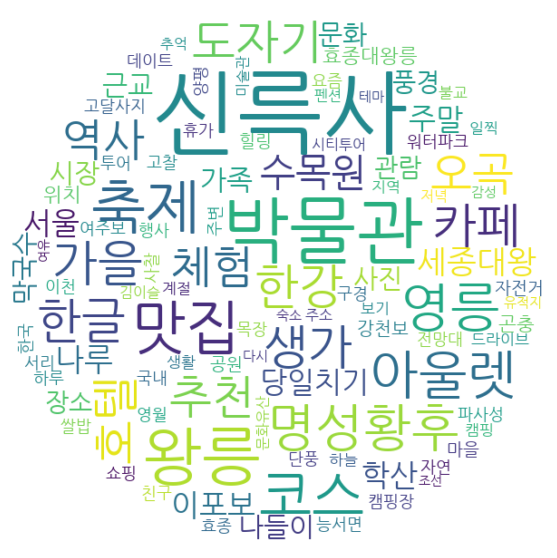

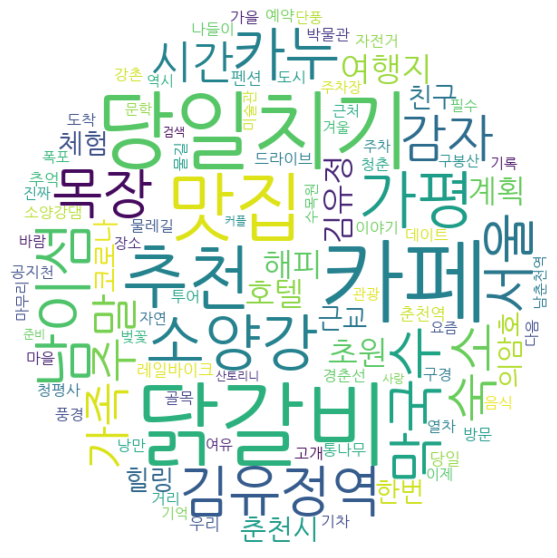

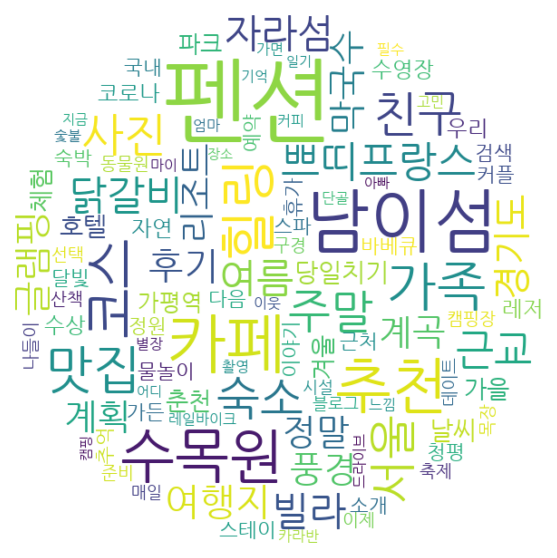

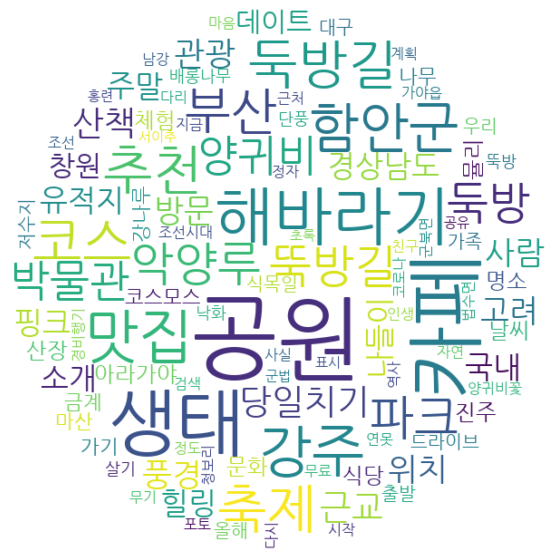

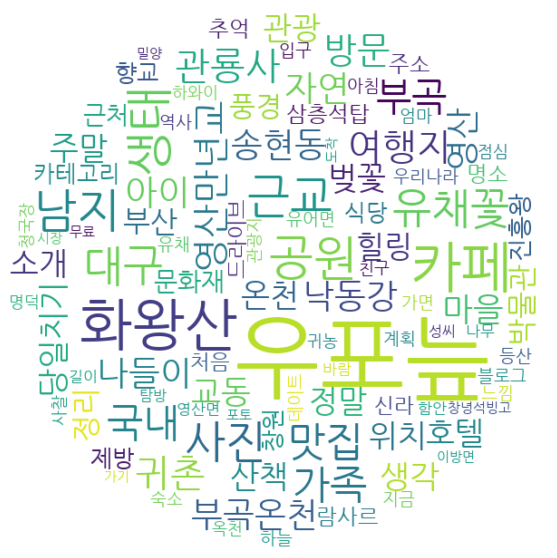

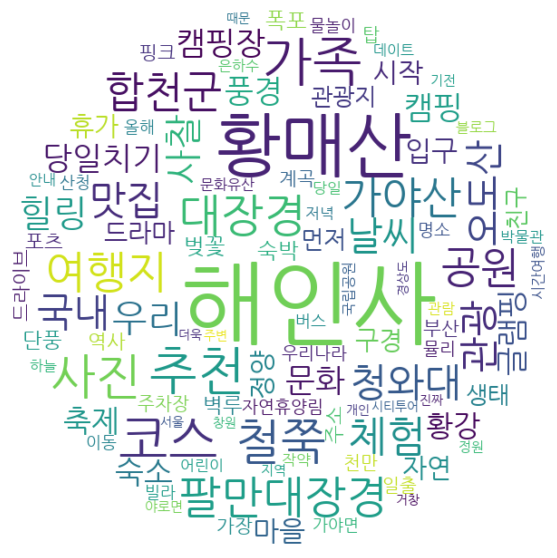

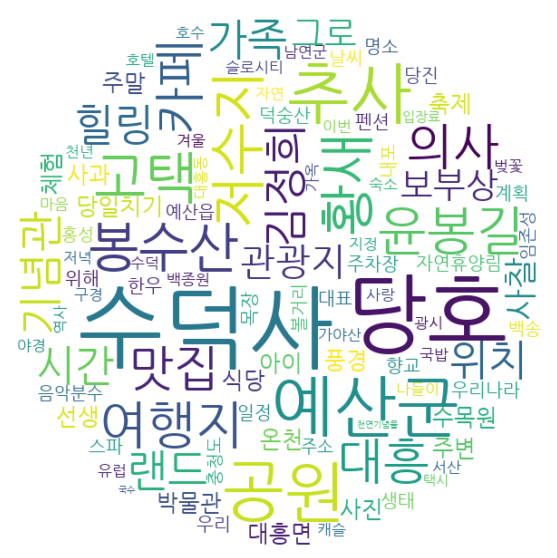

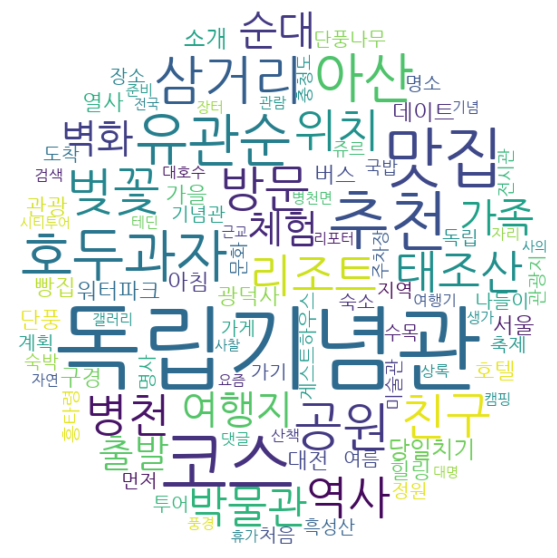

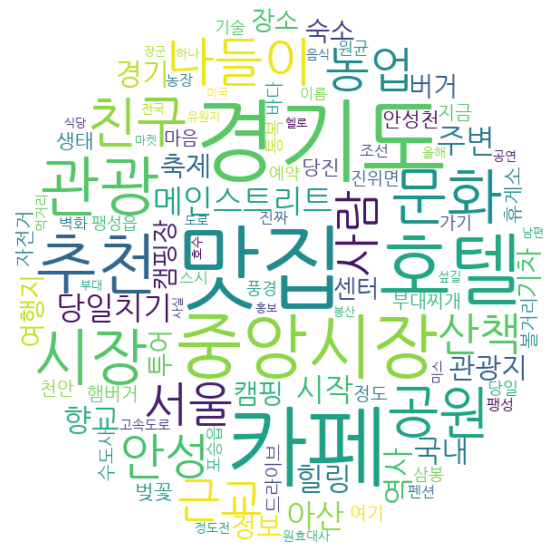

In [ ]:
plotting_WordCloud(Text_Preprocessing(yeoju, stopword_yeoju)) # 여주
plotting_WordCloud(Text_Preprocessing(chuncheon, stopword_chuncheon)) # 춘천
plotting_WordCloud(Text_Preprocessing(gapyeong, stopword_gapyeong)) # 가평

plotting_WordCloud(Text_Preprocessing(haman, stopword_haman)) # 함안
plotting_WordCloud(Text_Preprocessing(changnyeong, stopword_changnyeong)) # 창녕
plotting_WordCloud(Text_Preprocessing(hapcheon, stopword_hapcheon)) # 합천

plotting_WordCloud(Text_Preprocessing(yesan, stopword_yesan)) # 예산
plotting_WordCloud(Text_Preprocessing(cheonan, stopword_cheonan)) # 천안
plotting_WordCloud(Text_Preprocessing(pyeongtaek, stopword_pyeongtaek)) # 평택